# FROM TERMINAL, RUN THIS LINE:
jupyter nbconvert --execute --to html CRYPTO_MODEL_AUTOGEN.ipynb

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [22]:
from model import MODEL
import utils, plotting, fstats_pct_chg
import pandas as pd

In [23]:
#your intra-day time at which to evaluate the model.
day_hour = 18
#your tickers of interest
tickers = ['BTC-USD']

In [24]:
#do not edit below this cell!

In [25]:
#specify dates:
todays_date = pd.Timestamp.today()
start_date = todays_date - pd.Timedelta('200 days')
filter_date = start_date.floor(freq='D').replace(hour=day_hour)
#get data:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
#filter by datetime:
date_range = utils.create_date_range(start_date=filter_date, tz='Europe/Berlin')
model.apply_date_filter(date_range, force_apply=True)

[*********************100%***********************]  1 of 1 completed
[WARNING]: "force_apply" is active. Removing 2 NaN values.
[INFO]: filter applied.


In [26]:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 0.3                                  |
|                  Authors: Marco Rosenzweig & Patrick Lorenz                  |
--------------------------------------------------------------------------------
|                             ticker = ['BTC-USD']                             |
|                            start date = 02/20/20                             |
|                             end date = 09/06/20                              |
|                     initial investment per ticker = 200                      |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the penultimate one.
---------------------------------

In [27]:
plot_date = todays_date - pd.Timedelta('80 days')
plot_start = str(plot_date.date())

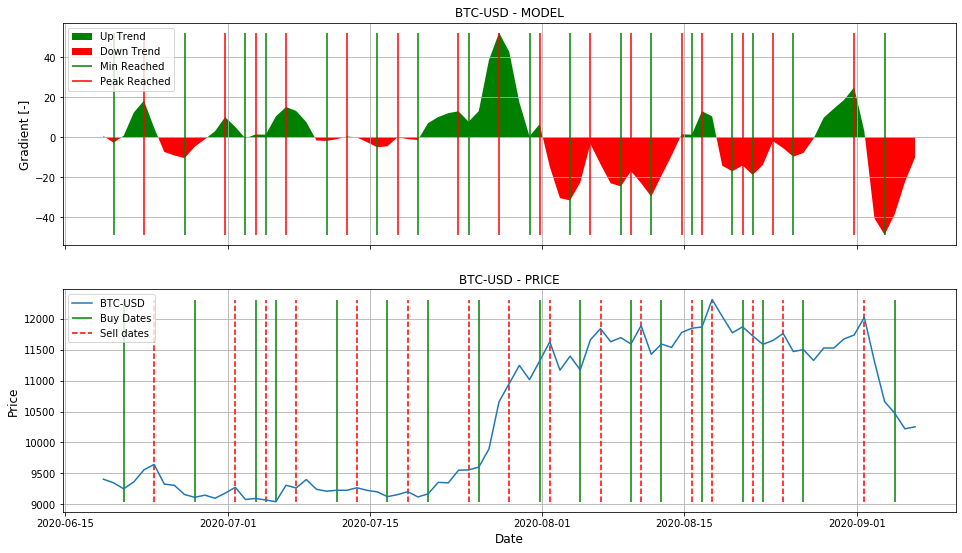

In [28]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date=plot_start)

In [29]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 10253.3486328125}
[INFO]: Break values: {'BTC-USD': array([ 9638.14771484, 10027.77496289])}
[INFO]: Tolerances: {'BTC-USD': array([-615.20091797, -225.57366992])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************


[INFO]: Current ticker: BTC-USD
--------------------------------------------------------------------------------
[INFO]: Result for value: 9517.670868408528


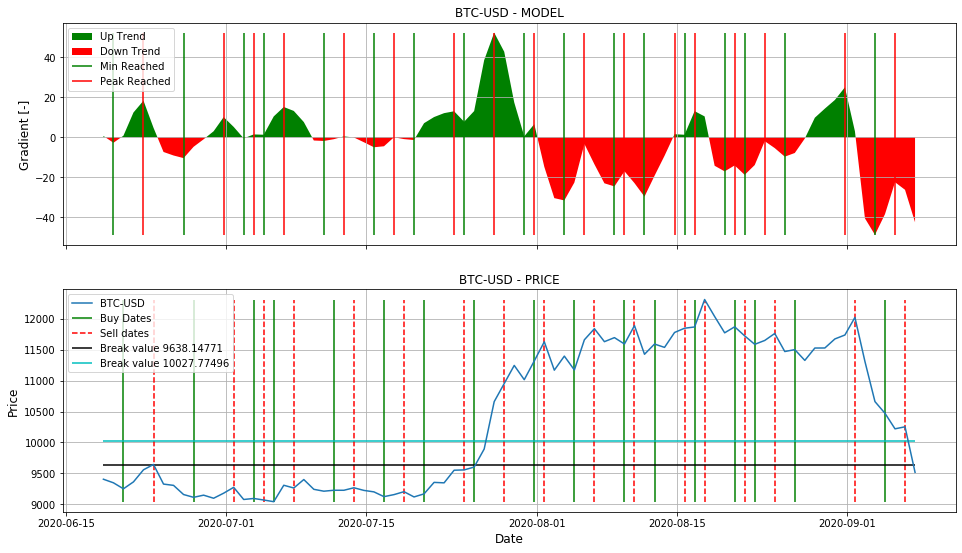

--------------------------------------------------------------------------------
[INFO]: Result for value: 9832.961338867543


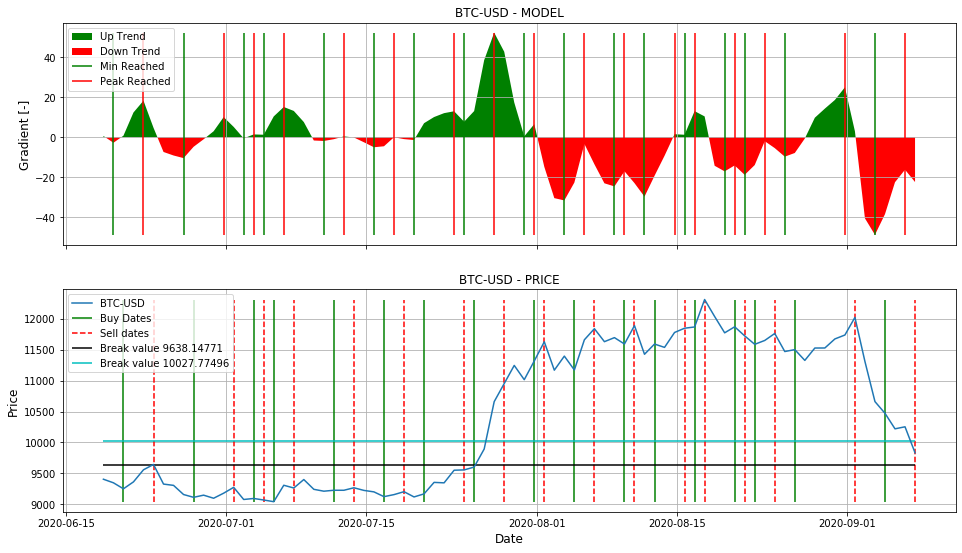

--------------------------------------------------------------------------------
[INFO]: Result for value: 10153.122149927143


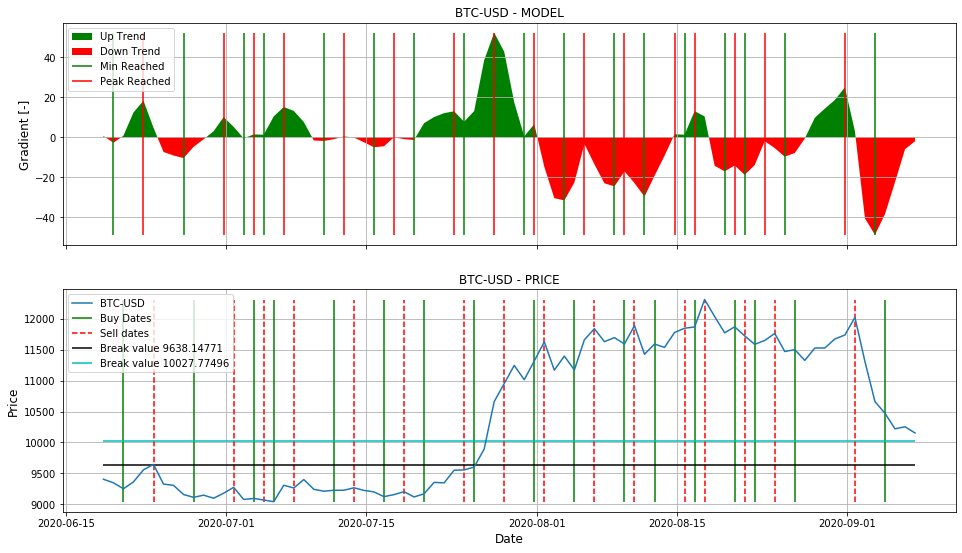

In [30]:
imag_model.show_possibilities(plot_from_date=plot_start, switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 10250.2314453125!
[STATS-INFO]: New tolerances: [-612.08373047 -222.45648242]!
[STATS-EVAL]: Probability for tol=-0.05971: 2.91%
[STATS-EVAL]: Probability for tol=-0.02170: 23.42%
[STATS-EVAL]: Probability between: 20.51%


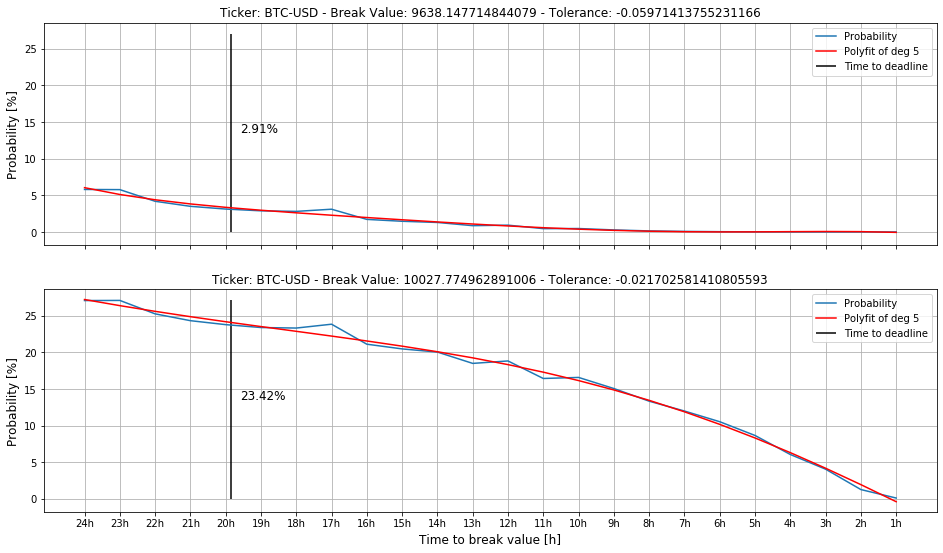

In [31]:
fstats_pct_chg.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [32]:
model.grad

{'BTC-USD': array([ 1.17506766e+01,  7.26818678e+00,  9.38584352e+00,  4.48598748e+00,
        -1.54995297e+01, -4.00401345e+01, -3.75126197e+01, -2.46006602e+01,
        -1.85662553e+01, -6.84356204e+00,  8.42426766e+00,  1.85648049e+01,
         1.41421392e+01,  2.62763046e+01,  3.14044802e+01,  1.73750931e+01,
        -1.13185247e+01, -4.35757046e+01, -3.77571553e+01, -1.89498326e+01,
        -5.96206767e+01, -1.04334891e+02, -7.04336768e+01, -1.87969667e+01,
         8.61749574e-01,  2.21722117e+01,  4.12008080e+01,  8.19117302e+01,
         1.10640087e+02,  7.72267533e+01,  4.53591752e+01,  4.11773677e+01,
         5.05248634e+01,  4.55381134e+01,  2.76498260e+01,  1.47100132e+01,
        -1.12479001e+01, -2.81491415e+01, -1.26959457e+01,  5.75711929e-01,
        -7.53221510e+00,  6.18760863e+00,  1.78750944e+01,  4.13726611e+00,
        -9.57995614e-01,  4.80448025e+00,  1.45254459e+01,  7.00572749e+00,
        -5.99134595e+00, -2.59546586e+01, -3.77780107e+01, -2.21770789e+01,
 

In [33]:
model.ticker_df

{'BTC-USD':              Buy Dates          Sell Dates    Buy Prices   Sell Prices  \
 0  2020-02-22 17:00:00 2020-02-23 17:00:00   9668.497605   9831.122536   
 1  2020-02-26 17:00:00 2020-03-03 17:00:00   8736.269735   8690.952104   
 2  2020-03-04 17:00:00 2020-03-06 17:00:00   8768.767025   9043.291626   
 3  2020-03-09 17:00:00 2020-03-11 17:00:00   7774.681576   7653.620879   
 4  2020-03-13 17:00:00 2020-03-20 17:00:00   5245.240944   6391.193164   
 5  2020-03-23 17:00:00 2020-03-24 17:00:00   6301.165364   6621.908221   
 6  2020-03-29 16:00:00 2020-03-31 16:00:00   6134.094369   6425.313318   
 7  2020-04-01 16:00:00 2020-04-03 16:00:00   6221.755076   6711.326539   
 8  2020-04-05 16:00:00 2020-04-07 16:00:00   6809.890307   7306.305017   
 9  2020-04-11 16:00:00 2020-04-13 16:00:00   6833.884493   6729.379342   
 10 2020-04-14 16:00:00 2020-04-18 16:00:00   6961.533390   7199.796245   
 11 2020-04-21 16:00:00 2020-04-24 16:00:00   6896.024628   7515.727845   
 12 2020-04-28

In [34]:
import time

In [35]:
#trying to analyse how many signal reversals occured:
def exec_model(end_date):
    '''
    This function provides models and imag models in order to analyse singal reversals
    Inputs: 
    param: end_date: pd.Timestamp up to which the model is evaluated.
    Returns: 
    param: model: class MODEL, evaluated up to end_date
    param: imag_model: class MODEL, evaluated up to end_date + 1 day
    '''
    start_date = end_date - pd.Timedelta('200 days')
    filter_date = start_date.floor(freq='D').replace(hour=day_hour)
    #get data:
    model = MODEL(tickers=tickers)
    model.get_data(start=start_date, end=end_date, interval='60m')
    #filter by datetime:
    date_range = utils.create_date_range(start_date=filter_date)
    model.apply_date_filter(date_range, force_apply=True, do_print=False)
    model.eval_model(do_print=False)
    #calc imag model:
    imag_model = model.copy_model()
    imag_model.append_timedelta(timedelta=1, do_print=False)
    imag_model.comp_break_values(tickers='all', parallel_computing=True, do_print=False)
    imag_model._init_model(do_print=False)
    return model, imag_model

def compare_models(model_day_00, model_day_01, column, tickers='all', do_print=False):
    #real model has index 0, imag model has index 1
    if tickers == 'all':
        tickers = model_day_00[0].tickers
    for ticker in tickers:
        if do_print:
            print('Comparing "{}" for ticker "{}"'.format(column, ticker))
            last_imag_values = [pd.Timestamp(val).strftime('%Y-%m-%d') for val in model_day_00[1].ticker_df[ticker][column].values[-2:]]
            print('Imag model, last values: {}'.format(last_imag_values))
            last_real_values = [pd.Timestamp(val).strftime('%Y-%m-%d') for val in model_day_01[0].ticker_df[ticker][column].values[-2:]]
            print('Real model, last values: {}'.format(last_real_values))
        yield model_day_00[1].ticker_df[ticker][column].values[-2:] == model_day_01[0].ticker_df[ticker][column].values[-2:]
        
def get_red_bold(string):
    return "\x1B[1m{}".format("\x1B[31m{}".format(string))

In [36]:
import time
def detect_signal_reversal(n_days):
    print('+' * 78)
    print('Starting algorithm...')
    start_time = time.time()
    signal_reversal_dict = {}
    print('+' * 78)
    for n in range(n_days):
        print('-' * 78)
        today = pd.Timestamp.today()
        end_date = today - pd.Timedelta('{} days'.format(n))
        print('Evaluating model up to {} (today - {} days)'.format(end_date.strftime('%Y-%m-%d'), n))
        #compute models:
        model_day_00 = exec_model(end_date=end_date - pd.Timedelta('1 days'))
        model_day_01 = exec_model(end_date=end_date)
        #compare models:
        for column in ['Buy Dates', 'Sell Dates']:
            if not all(next(compare_models(model_day_00=model_day_00, model_day_01=model_day_01, column=column, 
                                           do_print=True))):
                utils._print_issue('ERROR', 'MISMATCHING "%s"' %column)
                try:
                    signal_reversal_dict[end_date.strftime('%Y-%m-%d')] += column
                except KeyError:
                    signal_reversal_dict[end_date.strftime('%Y-%m-%d')] = column
        print('-' * 78)
    print('+' * 78)
    print('Algorithm terminated normally after {:.2f}sec'.format(time.time() - start_time))
    print('+' * 78)
    return signal_reversal_dict

In [37]:
n_days = 10
signal_reversal_dict = detect_signal_reversal(n_days=n_days)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Starting algorithm...
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------
Evaluating model up to 2020-09-06 (today - 0 days)
[*********************100%***********************]  1 of 1 completed


TypeError: apply_date_filter() got an unexpected keyword argument 'do_print'

In [15]:
if signal_reversal_dict == '{}':
    print('NO SIGNAL REVERSAL DETECTED')
else:
    for date, column in signal_reversal_dict.items():
        print(date, column)

NameError: name 'signal_reversal_dict' is not defined